# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(r"C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Fetch current BTC price
def get_btc_price():
    # CoinGecko API endpoint for cryptocurrency prices
    api_url = "https://api.coingecko.com/api/v3/simple/price"

    # Parameters for the API request
    params = {
        'ids': 'bitcoin',
        'vs_currencies': 'usd'
    }

    try:
        # Make the API request
        response = requests.get(api_url, params=params)
        response.raise_for_status()  # Check for errors in the HTTP response

        # Parse the JSON response
        data = response.json()

        # Extract the BTC price from the response
        btc_price = data['bitcoin']['usd']

        return btc_price

    except requests.exceptions.RequestException as e:
        print(f"Error fetching BTC price: {e}")
        return None

# Get and print the current BTC price
btc_price = get_btc_price()

if btc_price is not None:
    print(f"Current BTC Price: ${btc_price}")
else:
    print("Failed to fetch BTC price.")

Current BTC Price: $44246


In [5]:
# Fetch current ETH price
def get_eth_price():
    # CoinGecko API endpoint for cryptocurrency prices
    api_url = "https://api.coingecko.com/api/v3/simple/price"

    # Parameters for the API request
    params = {
        'ids': 'ethereum',
        'vs_currencies': 'usd'
    }

    try:
        # Make the API request
        response = requests.get(api_url, params=params)
        response.raise_for_status()  # Check for errors in the HTTP response

        # Parse the JSON response
        data = response.json()

        # Extract the ETH price from the response
        eth_price = data['ethereum']['usd']

        return eth_price

    except requests.exceptions.RequestException as e:
        print(f"Error fetching ETH price: {e}")
        return None

# Get and print the current ETH price
eth_price = get_eth_price()

if eth_price is not None:
    print(f"Current ETH Price: ${eth_price}")
else:
    print("Failed to fetch ETH price.")

Current ETH Price: $2437.59


In [6]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [7]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53095.20
The current value of your 5.3 ETH is $12919.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2022-01-14 05:00:00+00:00  112.17  112.545  112.15       24089  112.53   

                                                  SPY                 \
                            volume       vwap   close    high    low   
timestamp                                                              
2022-01-14 05:00:00+00:00  9166455  112.30925  464.72  465.09  459.9   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2022-01-14 05:00:00+00:00      855403  461.19  97790736  462.976481

In [12]:
# Pick AGG and SPY close prices
AGG_price = float(df_portfolio["AGG"]["close"])
SPY_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_price}")
print(f"Current SPY closing price: ${SPY_price}")

Current AGG closing price: $112.17
Current SPY closing price: $464.72


In [13]:
# Compute the current value of shares
my_spy_value = SPY_price * my_spy
my_agg_value = AGG_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23236.00
The current value of your 200 AGG shares is $22434.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
stock_bond_assets = my_agg_value + my_spy_value

value_data = {
    'amount': [crypto_assets, stock_bond_assets],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,66014.427
shares,45670.000


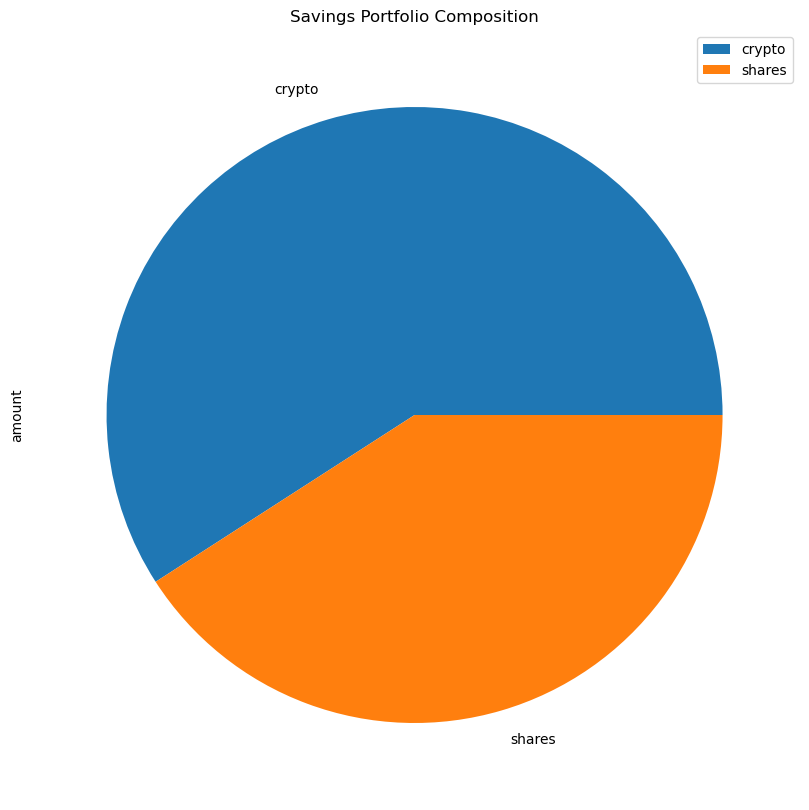

In [16]:
# Plot savings pie chart
savings = df_savings.plot.pie(y= 'amount', title="Savings Portfolio Composition", figsize=(10,10))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from achieving your financial goal. Keep saving!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_2 = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_2 = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_2, SPY_2],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 110.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 120.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 130.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 140.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 160.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 170.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 220.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 230.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 250.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 260.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 270.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 280.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 290.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 300.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 310.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 320.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 330.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 340.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 350.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 360.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 370.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 380.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 390.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 400.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 410.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 420.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 430.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 440.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 450.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 460.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 470.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 480.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997991,1.007355,0.990890,0.988051,0.999879,0.998432,0.991770,1.004421,0.991309,1.000885,...,1.004958,0.989420,0.993600,0.997148,0.997482,1.001123,1.007781,1.002375,0.994876,1.006253
2,1.004253,1.009708,0.996634,0.986676,0.993745,1.005763,0.993182,1.009732,0.992032,0.994525,...,1.008389,0.992252,1.002175,1.003249,1.003135,1.004506,1.010340,1.007153,0.995694,1.007865
3,1.001656,1.011760,0.998265,0.983400,0.991105,1.009519,0.995979,1.007558,0.998035,0.992735,...,1.003281,0.986137,1.004256,1.009367,1.002560,1.004070,1.003805,1.009503,1.000616,1.007972
4,0.996960,1.014957,0.999818,0.981280,0.997423,1.006076,0.990037,1.009191,0.997603,0.994750,...,1.004960,0.981431,1.012580,1.001133,0.999629,1.005263,1.000823,0.996041,1.005859,1.004769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.681304,3.832380,4.039367,7.563039,4.285824,11.403410,3.577254,10.622020,8.024964,8.834705,...,6.131042,7.005802,11.145938,4.823460,20.147021,11.073418,6.154917,12.713285,4.106492,6.174880
7557,7.773830,3.794434,4.033078,7.616960,4.287744,11.380450,3.618021,10.556612,8.014612,8.829689,...,6.106523,6.975937,11.190343,4.794991,20.308748,11.170191,6.160748,12.730261,4.101865,6.174450
7558,7.779557,3.796467,4.057846,7.612312,4.305716,11.389083,3.620361,10.531978,7.992153,8.770840,...,6.116582,6.931416,11.132019,4.776925,20.387390,11.172283,6.107618,12.744256,4.123042,6.191035
7559,7.778580,3.797089,4.068592,7.587416,4.311851,11.446687,3.625793,10.554628,7.986127,8.720285,...,6.103458,6.915832,11.115545,4.783205,20.463738,11.226910,6.053120,12.736788,4.087796,6.182069


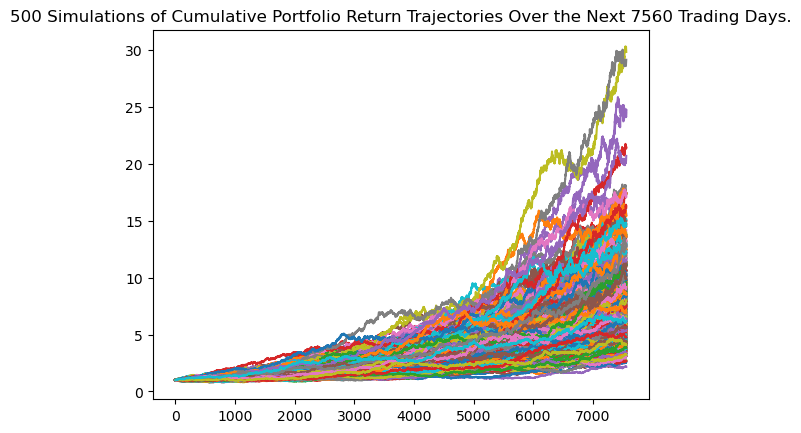

In [28]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

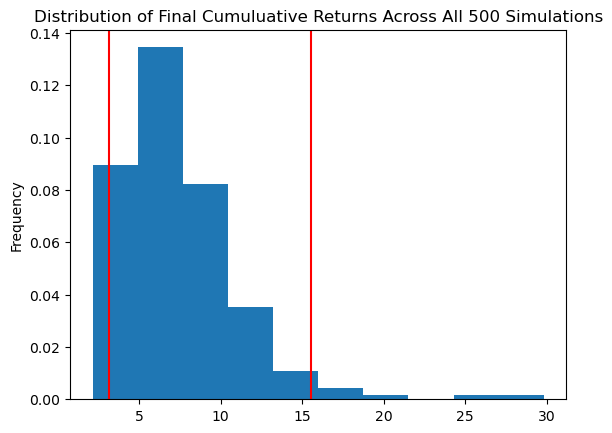

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              7.454182
std               3.552228
min               2.160451
25%               4.938720
50%               6.816117
75%               9.002817
max              29.821980
95% CI Lower      3.123927
95% CI Upper     15.516624
Name: 7560, dtype: float64


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62478.54 and $310332.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $93717.8 and $465498.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996828,1.003764,0.994801,0.998556,1.001615,1.003536,0.996841,0.999306,1.002321,1.006743,...,1.007349,1.000824,1.004233,0.996977,0.994159,0.996325,0.992140,0.999295,1.003837,1.002029
2,0.998376,0.999427,0.996460,1.004982,0.999156,1.001411,0.990802,0.996260,0.998908,0.995190,...,1.002685,1.003593,1.001137,0.993497,0.996032,0.999292,0.996033,0.991042,1.011659,0.999922
3,0.997438,1.005385,1.003007,1.001184,1.003247,0.998410,0.992949,0.992939,0.998628,0.996258,...,1.005737,1.001157,1.002086,0.993641,0.999956,1.002128,0.996849,0.980657,1.006816,0.994483
4,1.008463,1.011814,1.005275,1.000959,1.009930,1.000858,0.987790,0.997162,1.001140,0.986064,...,1.008590,1.002089,1.003124,0.998612,1.005499,0.996326,0.996709,0.988291,1.013273,0.993543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.503399,1.803953,1.264594,1.423770,1.620482,1.126630,1.229984,1.125023,1.063127,1.847054,...,1.558494,1.538580,1.155626,1.136923,1.157783,1.434556,1.401448,1.129236,1.673830,1.234599
1257,1.484257,1.803120,1.252700,1.428228,1.631691,1.127294,1.223773,1.125681,1.060839,1.838916,...,1.550304,1.544816,1.152183,1.141840,1.146711,1.436548,1.399753,1.133546,1.676220,1.238499
1258,1.478918,1.797537,1.244996,1.415196,1.637978,1.127283,1.234755,1.126356,1.060166,1.835280,...,1.539754,1.552003,1.149616,1.143231,1.146386,1.432766,1.401094,1.140328,1.672793,1.219734
1259,1.479096,1.794616,1.254252,1.413159,1.642386,1.133037,1.241971,1.133611,1.057467,1.837122,...,1.536198,1.559595,1.148299,1.139666,1.154275,1.431297,1.407238,1.146968,1.669012,1.216650


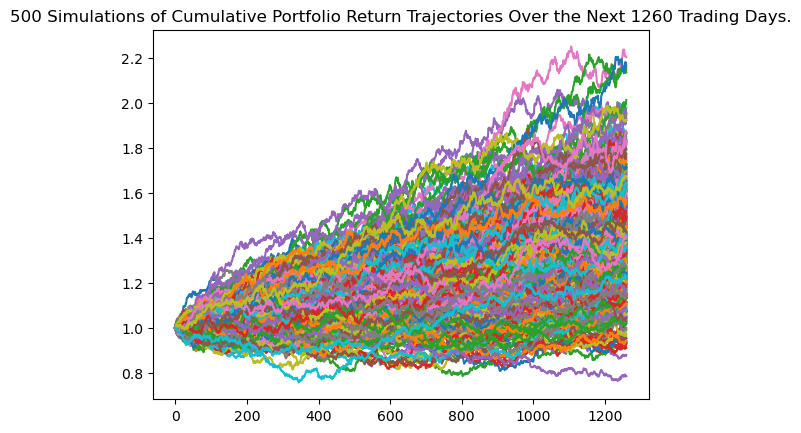

In [36]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

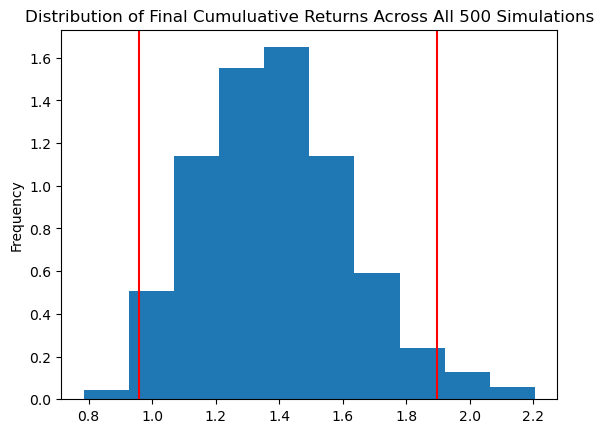

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.386650
std               0.237339
min               0.785301
25%               1.218438
50%               1.372619
75%               1.545745
max               2.204566
95% CI Lower      0.959096
95% CI Upper      1.897021
Name: 1260, dtype: float64


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(summary[8]*initial_investment,2)
ci_upper_five = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19181.92 and $37940.43


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 110.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 120.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 130.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 140.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 150.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 160.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 170.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 180.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 190.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 200.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 210.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 220.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 230.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 240.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 250.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 260.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 270.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 280.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 290.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 300.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 310.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 320.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 330.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 340.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 350.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 360.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 370.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 380.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 390.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 400.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 410.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 420.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 430.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 440.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 450.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 460.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 470.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 480.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

Running Monte Carlo simulation number 490.


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999977,1.002364,0.996472,1.007938,0.996388,1.006171,1.005640,1.001031,1.005188,1.003711,...,0.996709,1.000851,1.001965,0.996406,0.999124,0.998362,0.998354,0.996316,0.999948,1.000834
2,0.993466,1.006463,0.993705,0.996546,0.997984,1.005120,1.009272,0.999070,1.001280,1.005532,...,1.000251,0.995947,1.008939,0.995409,0.995361,0.997687,1.003404,0.992301,0.995447,0.992468
3,0.994400,1.010963,0.990634,1.002523,0.991355,0.993921,1.008263,1.001202,1.004068,1.003334,...,0.995943,1.003683,1.004088,0.996257,0.996131,0.995896,0.993816,0.995335,0.995332,0.999007
4,0.998614,1.018625,0.992905,1.000564,0.987279,0.996301,1.011656,1.006800,1.002841,1.002379,...,0.988176,0.996725,1.010710,0.998613,0.999862,0.993720,0.995551,0.992389,0.995481,1.004563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.940765,1.413666,1.420780,1.415432,1.634567,1.549004,1.177184,2.141503,1.816130,2.478417,...,1.712078,1.181188,1.781992,2.583696,1.735522,1.293941,1.319011,1.932523,3.113908,1.730648
2517,1.935167,1.411287,1.401872,1.417714,1.644219,1.546224,1.170106,2.150960,1.814666,2.473413,...,1.703923,1.184106,1.788606,2.590531,1.729331,1.300779,1.328871,1.938999,3.110596,1.737950
2518,1.937672,1.410311,1.404112,1.421915,1.636017,1.548917,1.175418,2.155963,1.808220,2.466307,...,1.708256,1.172012,1.795050,2.593123,1.717413,1.305893,1.334111,1.935576,3.097829,1.746993
2519,1.938079,1.412200,1.403433,1.409134,1.622684,1.541669,1.179918,2.173001,1.805900,2.466746,...,1.705604,1.173738,1.804856,2.562296,1.720115,1.313598,1.323889,1.938600,3.120424,1.749701


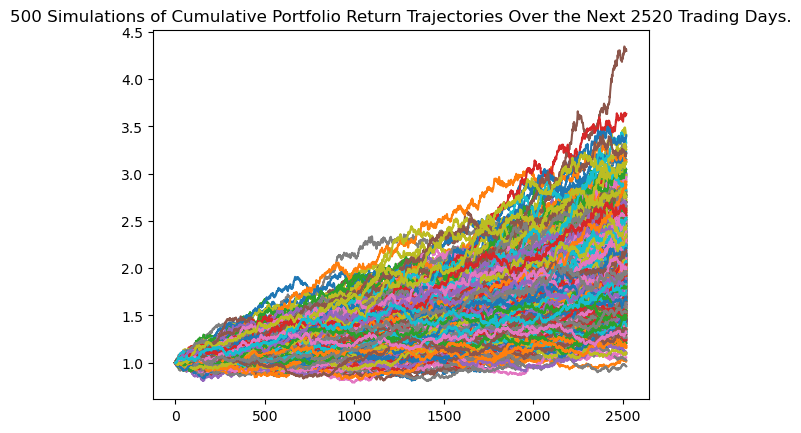

In [42]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

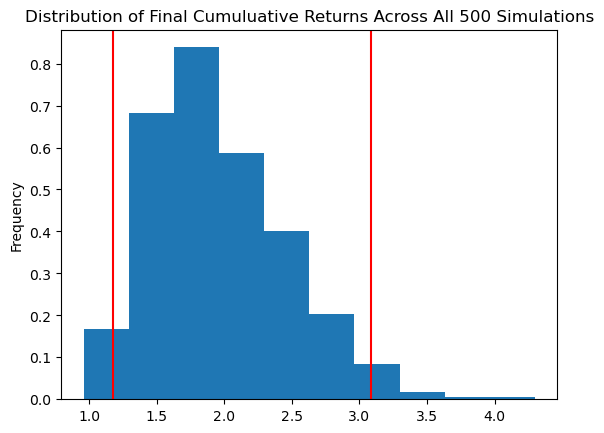

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(summary_ten)

count           500.000000
mean              1.956412
std               0.500204
min               0.961115
25%               1.589128
50%               1.883370
75%               2.261372
max               4.298618
95% CI Lower      1.179258
95% CI Upper      3.085682
Name: 2520, dtype: float64


C:\Users\juddm\JupyterLab-Workspace\05-APIs\Unit 5 Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [45]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23585.16 and $61713.65
